# Morphology and edges skimage

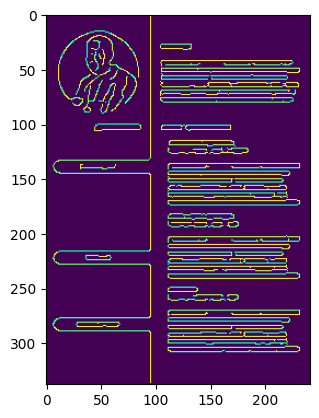

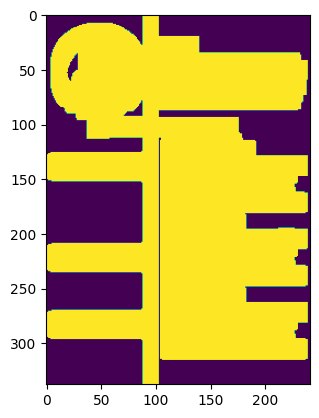

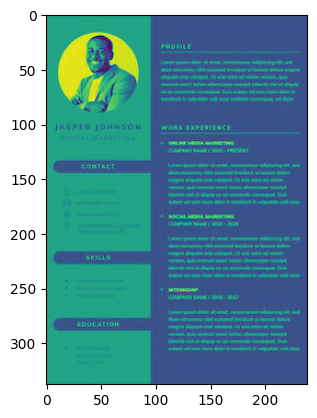

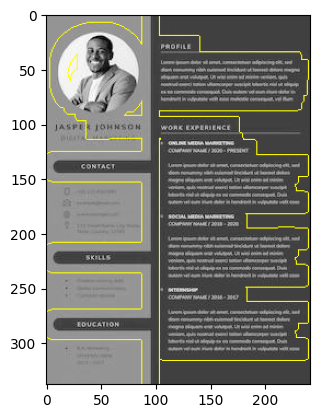

In [349]:
from skimage import io, color, feature, morphology, segmentation
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image
import numpy as np
from skimage.measure import regionprops, label

img = io.imread('./dataset/train/stylish-editable-cv-template-downloadable-psd-resume-professionals-entry-level-positions_53876-150702_jpg.rf.4a2db504cfa86df7cd2f32361b9d0da0.jpg')
rgb_img = img[:, :, :3]
gray_img = color.rgb2gray(rgb_img)
edges = feature.canny(gray_img, sigma=2)

plt.imshow(edges)
plt.show()

edges_dilated = morphology.dilation(edges, morphology.square(15))

plt.imshow(edges_dilated)
plt.show()

segments = segmentation.mark_boundaries(gray_img, edges_dilated)
regions = regionprops(label(edges_dilated))

for region in regions:
    minr, minc, maxr, maxc = region.bbox
    cropped_region = gray_img[minr:maxr, minc:maxc]
    pil_image = Image.fromarray((cropped_region * 255).astype(np.uint8))
    extracted_text = pytesseract.image_to_string(pil_image, config='--psm 6')
    print(extracted_text)
    plt.imshow(cropped_region)
    plt.show()
plt.imshow(segments, cmap='gray')
plt.show()

In [2]:
import cv2
import fitz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from shapely.geometry import box
import pytesseract

def calculate_text_similarity(text1, text2):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([text1, text2])
    similarity_percentage = cosine_similarity(vectors)[0, 1] * 100
    return similarity_percentage

def overlap_ratio(box1, box2):
    rect1 = box(*box1)
    rect2 = box(*box2)
    intersection = rect1.intersection(rect2)
    area_intersection = intersection.area
    area_box1 = rect1.area
    area_box2 = rect2.area
    overlap_ratio1 = area_intersection / area_box1
    overlap_ratio2 = area_intersection / area_box2
    return max(overlap_ratio1, overlap_ratio2)

threshold = 0.3
similarity_overall = 0

for i in range(1, 11):
    pdf_path = f"./test/resume_{i}.pdf"
    image_path = f"./test/resume_{i}.jpg"
    pdf_document = fitz.open(pdf_path)
    pymupdf_text = ""
    
    # Extract text from PDF using PyMuPDF
    pdf_page = pdf_document[0]
    text_page = pdf_page.get_text("text")
    pymupdf_text += text_page
    pdf_document.close()
    
    # Load image
    image = cv2.imread(image_path)
    
    # Convert image to grayscale
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Canny edge detection
    edges = cv2.Canny(gray_img, 100, 200)
    
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    code_text = ""
    # Iterate through contours
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cropped_region = gray_img[y:y+h, x:x+w]
        
        # Use Tesseract OCR for text extraction
        extracted_text = pytesseract.image_to_string(cropped_region)
        code_text += extracted_text
        print(code_text)
    # Calculate text similarity
    similarity_percentage = calculate_text_similarity(code_text, pymupdf_text)
    print(similarity_percentage)
    similarity_overall += similarity_percentage

similarity_overall /= 10
print(similarity_overall)


KeyboardInterrupt: 

# Laplacian

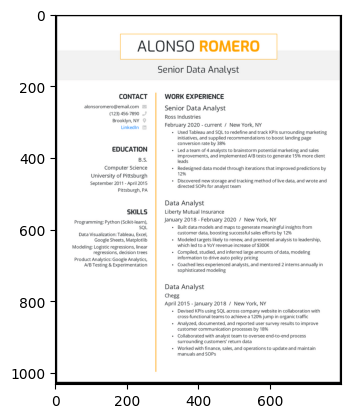

In [342]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('4.png')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

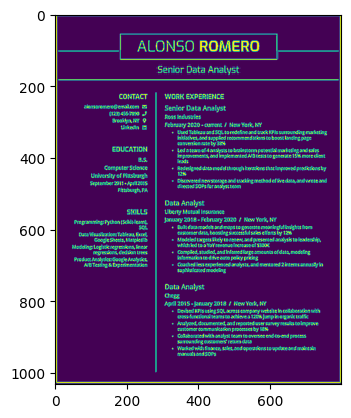

In [245]:
src = cv2.GaussianBlur(RGB_img, (3, 3), 0)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
edges = cv2.Laplacian(gray, -1, ksize=5, scale=5,delta=0,borderType=cv2.BORDER_DEFAULT)
plt.imshow(edges)

In [10]:
def extract_text_regions(image):
    image = image.astype(np.uint8)
    _, labels, stats, _ = cv2.connectedComponentsWithStats(image, connectivity=4)
    bounding_boxes = stats[1:, :4]
    return bounding_boxes


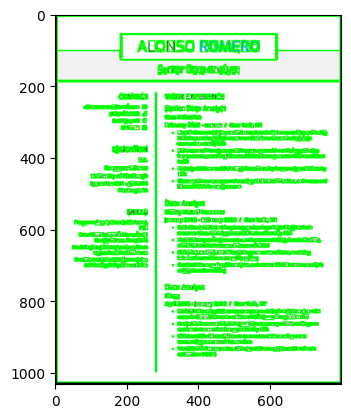

In [343]:
import pytesseract
from PIL import Image

_, binary_edges = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY)

bounding_boxes = extract_text_regions(binary_edges)
image_with_boxes = img.copy()
for (x, y, w, h) in bounding_boxes:
    cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(image_with_boxes)
plt.show()


In [ ]:
extracted_text = ""
for box in bounding_boxes:
    x, y, w, h = box
    roi = img[y:y + h, x:x + w]
    text = pytesseract.image_to_string(Image.fromarray(roi))
    extracted_text += text + "\n"
    print("Extracted Text:\n", extracted_text)


# Laplacian of gaussian
reference: https://medium.com/aimonks/exploring-the-laplacian-operator-a-key-tool-in-computer-vision-for-edge-detection-and-image-95ffc7339db6

In [58]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("./4.png", cv2.IMREAD_COLOR)
image = cv2.GaussianBlur(image, (3, 3), 0)

In [59]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
filtered_image = cv2.Laplacian(gray, -1, ksize=9, scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)

In [346]:
_, binary_edges = cv2.threshold(filtered_image, 0, 255, cv2.THRESH_BINARY)

bounding_boxes = extract_text_regions(binary_edges)
image_with_boxes = image.copy()
for (x, y, w, h) in bounding_boxes:
    cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
extracted_text = ""
for box in bounding_boxes:
    x, y, w, h = box
    roi = image[y:y + h, x:x + w]
    text = pytesseract.image_to_string(Image.fromarray(roi))
    extracted_text += text + "\n"
    print(extracted_text)

 

 

ALONSO ROMERO

Senior Data Analyst

 

 

 

CONTACT WORK EXPERIENCE

alonsoromero@email.com

Senior Data Analyst
Ross industries

(123) 456-7890
Brooklyn, NY
Unkedin February 2020 - current / New York, NY
+ Used Tableau and SQL to redefine and track KPIs surrounding marketing
initiatives, and supplied recommendations to boost landing page

conversion rate by 38%

EDUCATION + Ledateam of 4

 

natysts to brainstorm potential marketing and sales


 

 

ALONSO ROMERO

Senior Data Analyst

 

 

 

CONTACT WORK EXPERIENCE

alonsoromero@email.com

Senior Data Analyst
Ross industries

(123) 456-7890
Brooklyn, NY
Unkedin February 2020 - current / New York, NY
+ Used Tableau and SQL to redefine and track KPIs surrounding marketing
initiatives, and supplied recommendations to boost landing page

conversion rate by 38%

EDUCATION + Ledateam of 4

 

natysts to brainstorm potential marketing and sales



 

 

ALONSO ROMERO

Senior Data Analyst

 

 

 

CONTACT WORK EXPERIENCE

alonso

ValueError: tile cannot extend outside image

Text(0.5, 1.0, 'Original Image with bounding boxes')

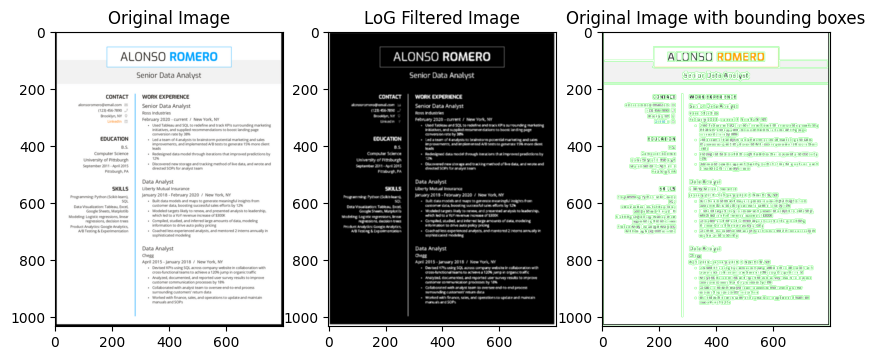

In [252]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(filtered_image, cmap='gray')
plt.title('LoG Filtered Image')

plt.subplot(133)
plt.imshow(image_with_boxes)
plt.title('Original Image with bounding boxes')

# Open_cv canny

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image
image_path = "./4.png"
original_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_image, 25, 50, apertureSize=5, L2gradient=True)
extracted_text = pytesseract.image_to_string(Image.fromarray(edges))

print("Extracted Text:")
print(extracted_text)


Extracted Text:
 

ALONSO ROMERO

 

 

 

 

coe
es ccoreoo ey
foro)
onto

eUesiioly)

easy

LecimpuersSalepacy

LU aieRs ACEI SELU ey

Pees eee
Crore nos

SKILLS
Crea rca
Sal

(ela eialuatos Seven eed
Core criy
Deore race ented
erento

Greet a ORCS
eaters nel (onsen aca

 

 

 

 

WORK EXPERIENCE

Sentor Data Analyst
Ress industries
Ra Re Naa
eS ee SON Ce Meas oe LOA ae  oa eT
Pei dnter com ouK ful eas nec cacao xc uA oug|
feces me TE ey
Be Ce col emit Caran i SNie rou Onn xcs MeO Lac rat OR Ee
ri fencer teen coy ohcon cheer Seren (Lens

 

 

 

ee a z
we

Se ee ae crear ena aie eee an Ro eee
reese ees aaa)

 

persis
ete
Fe ee Oe a

Beto c odes ees ono cinema Mca nn)
eee no cos ny tieccen ois te ous eat ca)
EC ecolmee cline (cloned me een cone at OC en
panne Peel Micucn ines Lope
See a eS)
Poratien ec mene co aica)
Roe ener mes eneer oneness ia

Data Analyst

 

OER neo RBS co hoa
Tae ON aa eI eT)
feed eet cota centers eee ee aid
ee cee eee ee ete ede ee ed
eee can eee ay
otro er

In [331]:
bounding_boxes = extract_text_regions(edges)
image_with_boxes = image.copy()
for (x, y, w, h) in bounding_boxes:
    cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)


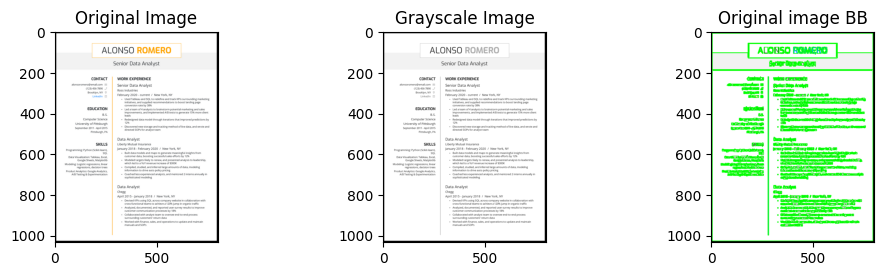

In [332]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(original_image[:, :, ::-1])
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(2, 3, 3)
plt.imshow(image_with_boxes, cmap='gray')
plt.title('Original image BB')

plt.show()


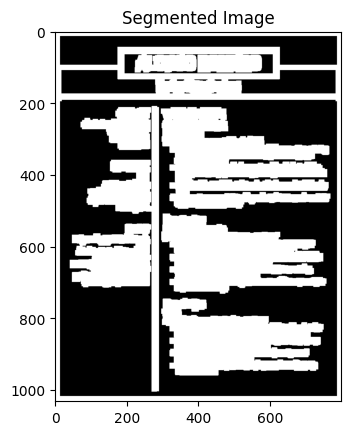

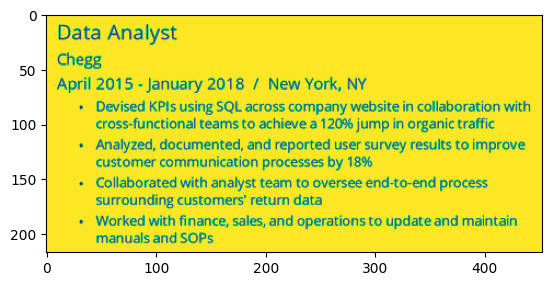

Extracted Text: PE WEIN Aa
oe
ee ORLA
ee gern ee eet An nes ec ean
cross-functional teams to achieve a 120% jump in organic traffic
ee ne en ence ee A rere eS
Greet ae aE
eee ea ee oe
Brera)
+ Worked with finance, sales, and operations to update and maintain
manuals and SOPs



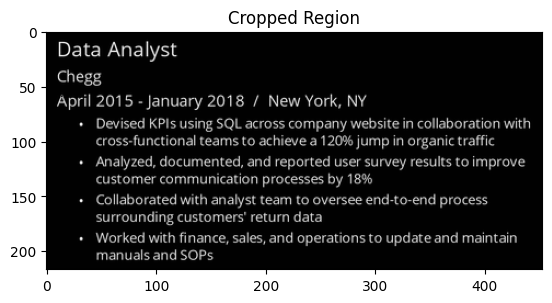

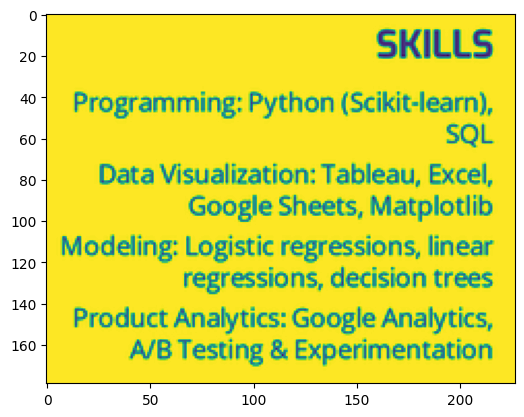

Extracted Text: SKILLS

Programming: Python (Scikit-earn),
sau

Data Visualization: Tableau, Excel,
Cen

Wee anaes ag
regressions, decision trees
eee eRe ee
ACS eco



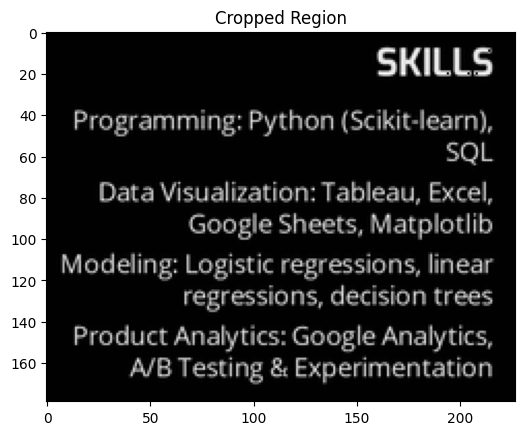

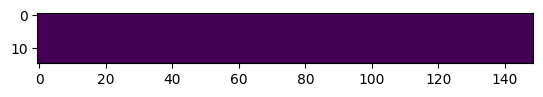

Extracted Text: 


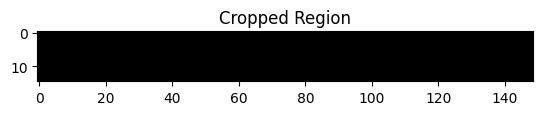

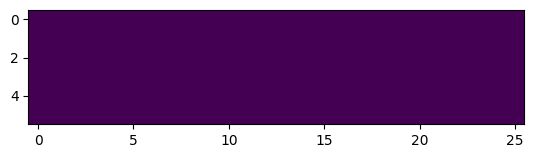

Extracted Text: 


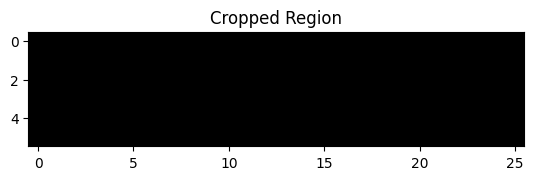

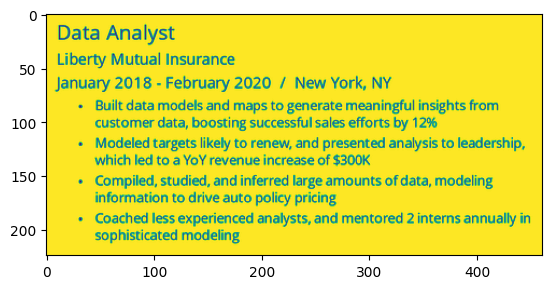

Extracted Text: Data Analyst
Pena ea
CaCO Rad
eee ae Or eae aS et
Cee enn eee ee tte mrad
+ Modeled targets likely to renew, and presented analysis to leadership,
RN Oe Ae enone i 4
See et ee ee eR
DOR ers iog card
+ Coached less experienced analysts, and mentored 2 interns annually in
eee



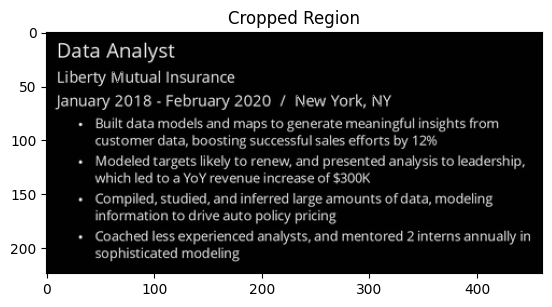

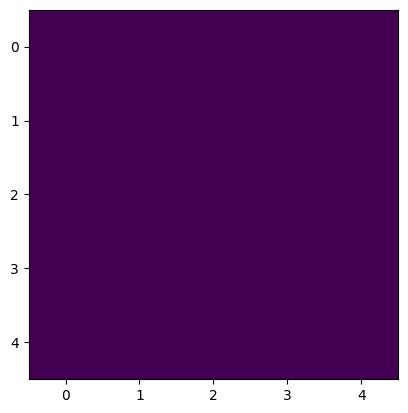

Extracted Text: 


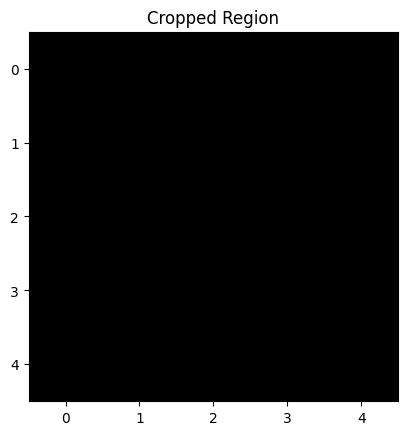

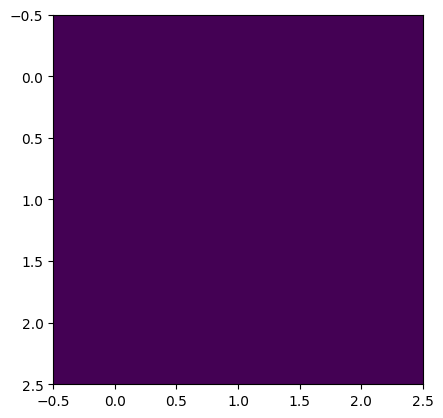

Extracted Text: 


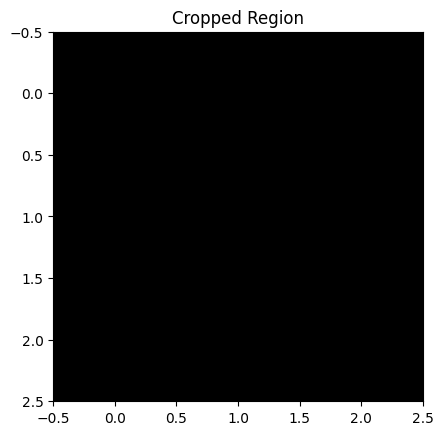

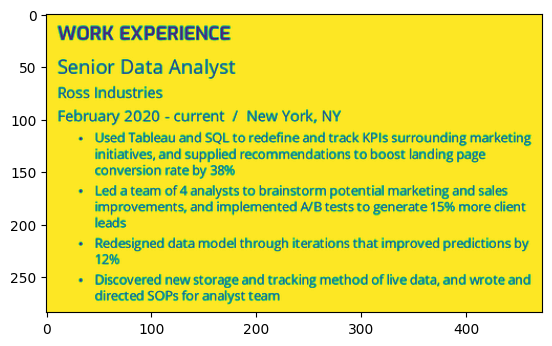

Extracted Text: Ale) a tas le
Senior Data Analyst
Perea
oe eee ORL
Bene eRe Cie ieee acct
Et a eee nO eed art od
CES
Bee eee nea ca ete a es
eee a ae ae a as
en
eee a ae Reese
oy
+ Discovered new storage and tracking method of live data, and wrote and
Clee oe een



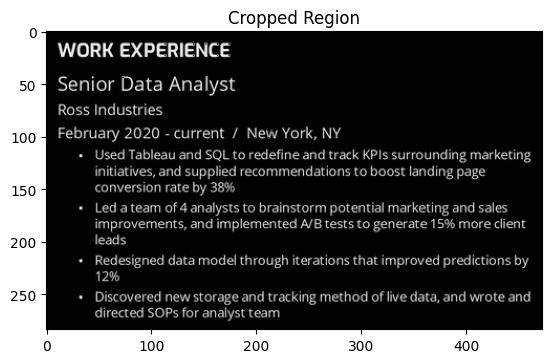

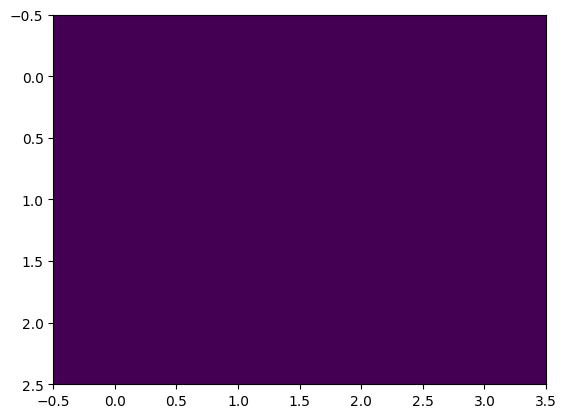

Extracted Text: 


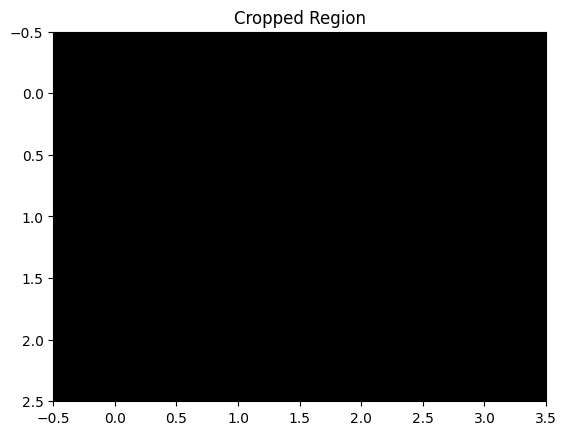

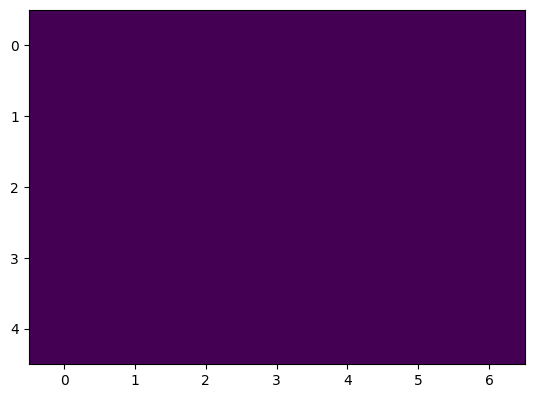

Extracted Text: 


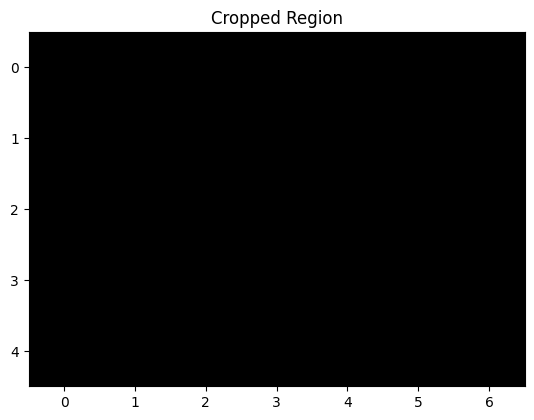

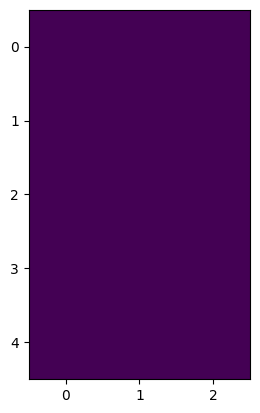

Extracted Text: 


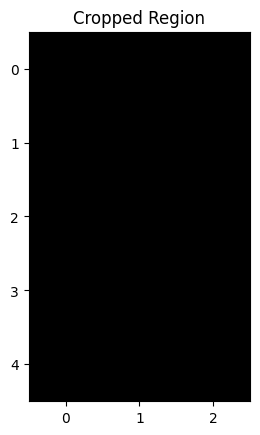

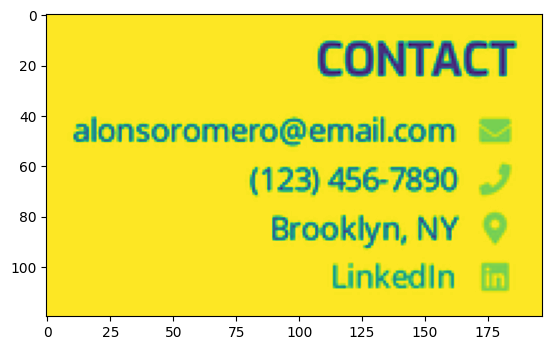

Extracted Text: foe) i lee
Enno
CPE Eo
Cream
Linkedin



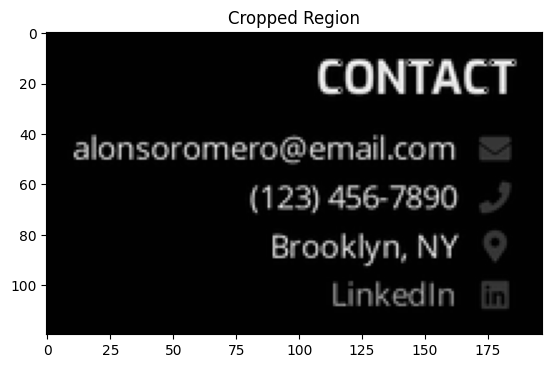

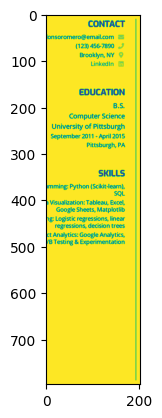

Extracted Text: foe) i lee
SRR Oe
(123) 456-7890
Cream
Linkedin
EDUCATION
cae
eT eee
eR a eon)
See eed
Geeta
SKILLS
UD aa MCs
sau
Net enon
Cen
Pa ae
regressions, decision trees
ct Analytics: Google Analytics,
es tt co



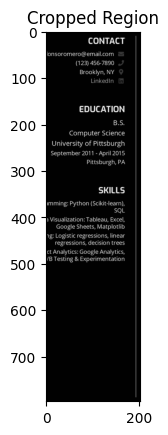

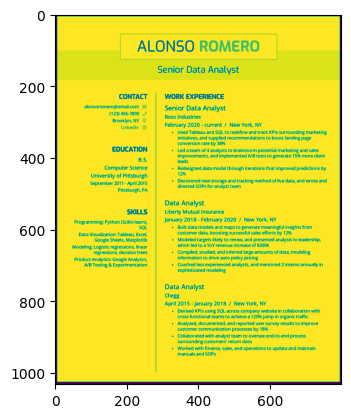

Extracted Text: Senior Data Analyst
foe) i lee Ale) a tas le
Eu Rey Cena ee Gras
(123) 456-7890 5
Perea
cro ad
eae Patent CRC La a
+ Used Tableau and SQL to redefine and track KPIs surrounding marketing
Et a eee nO eed art od
eee EL
EDUCATION + Led a team of 4 analysts to brainstorm potential marketing and sales
eee a ae ae a as
cae pn
eta eee a ae Reese
OSM ay 12%
i + Discovered new storage and tracking method of live data, and wrote and
September 2011 - April 2015 Clee oe een
Cre an
Data Analyst
me) Pena ea
eee een CaCO Rad
oll eee ae Or eae aS et
een ae oe ee customer data, boosting successful sales efforts by 1236
Coe omy + Modeled targets likely to renew, and presented analysis to leadership,
Tere ee ee RN Oe Ae enone i 4
regressions, decision trees See et ee ee eR
Product Analytics: Google Analytics, Dee Ey or
ROS or ees + Coached less experienced analysts, and mentored 2 intems annually in
eee
PE WEIN Aa
fle
ee ORLA
ee gern ee eet An nes ec ean
cross-functional teams to achieve 

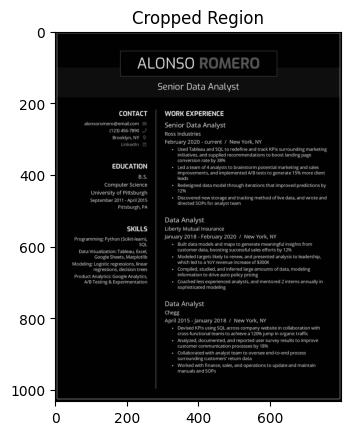

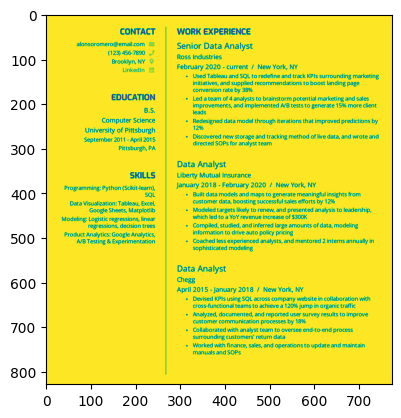

Extracted Text: foe) i lee Ale) a tas le
Eu Rey Cena ee Gras
(123) 456-7890 5
Perea
cro ad
eae oe eee ORL
Bene eRe Cie ieee acct
Et a eee nO eed art od
Cee LLL)
EDUCATION + Led a team of 4 analysts to brainstorm potential marketing and sales
eee a ae ae a as
cae pn
eta eee a ae Reese
OSM ay 12%
i + Discovered new storage and tracking method of live data, and wrote and
September 2011 - April 2015 Clee oe een
Cre an
Data Analyst
SKILLS Team eee
eee een CaCO Rad
oll eee ae Or eae aS et
een ae oe ee customer data, boosting successful sales efforts by 1236
Coe omy + Modeled targets likely to renew, and presented analysis to leadership,
Tere ee ee RN Oe Ae enone i 4
regressions, decision trees See et ee ee eR
DR Cn ree DOR ers iog card
ROS or ees + Coached less experienced analysts, and mentored 2 interns annually in
eee
PE WEIN Aa
oe
ee ORLA
ee gern ee eet An nes ec ean
cross-functional teams to achieve a 120% jump in organic traffic
ee ne en ence ee A rere eS
Greet ae aE
eee ea ee oe
Brera

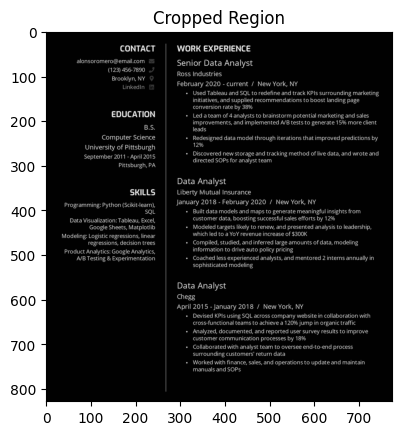

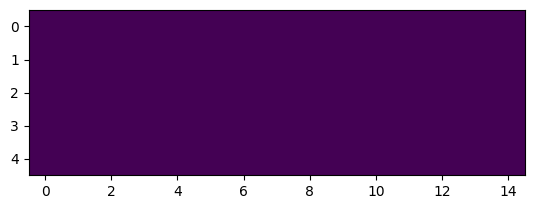

Extracted Text: 


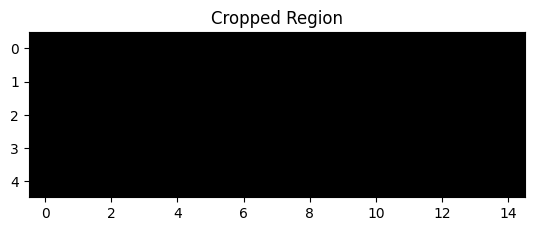

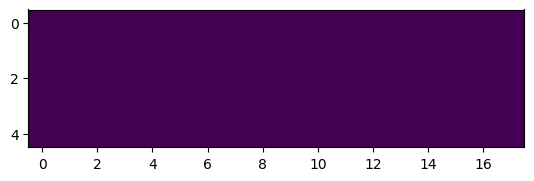

Extracted Text: 


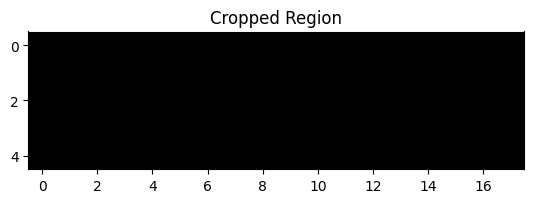

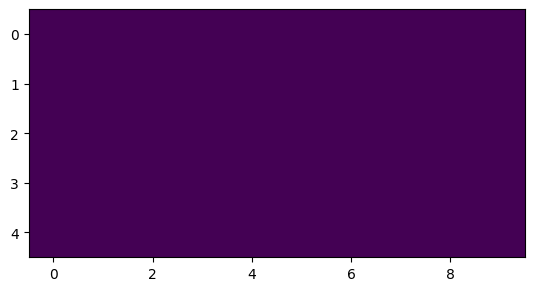

Extracted Text: 


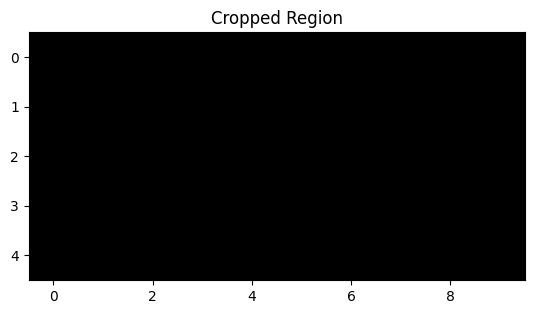

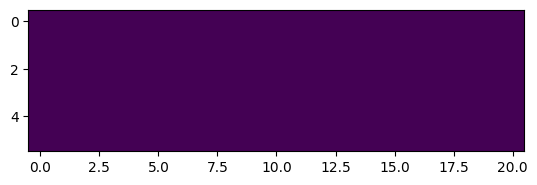

Extracted Text: 


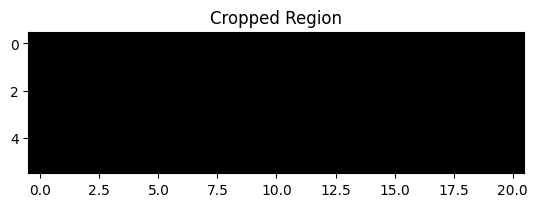

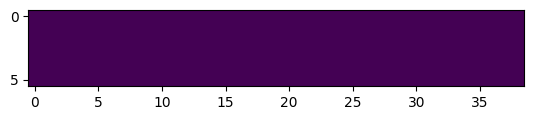

Extracted Text: 


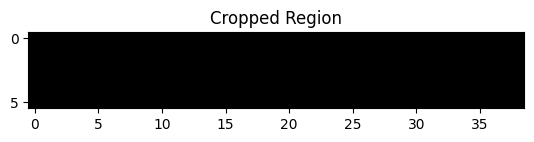

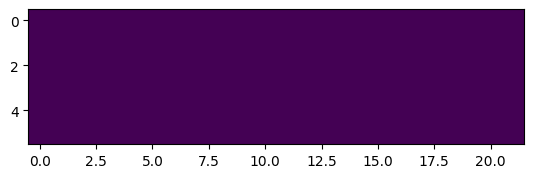

Extracted Text: 


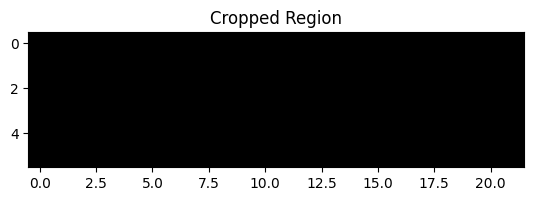

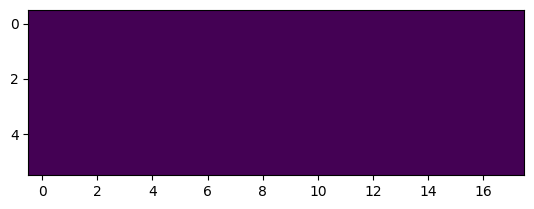

Extracted Text: 


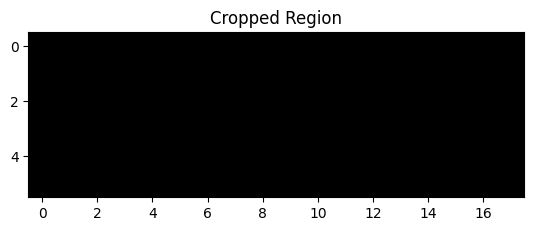

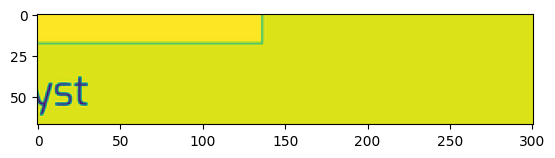

Extracted Text: eae



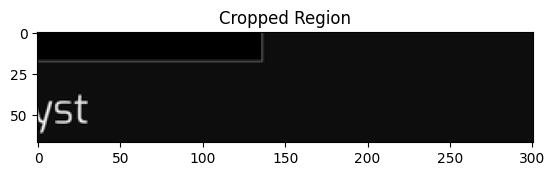

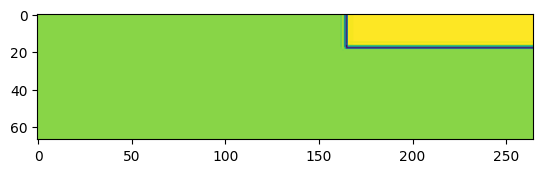

Extracted Text: —



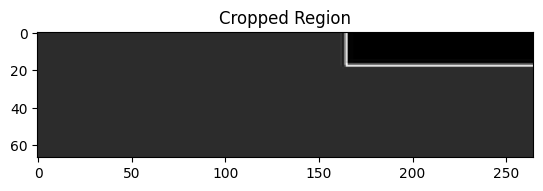

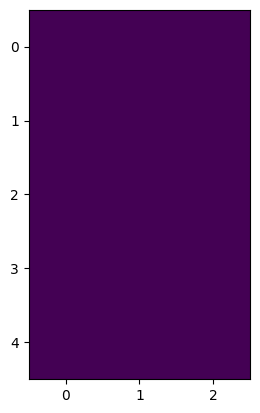

Extracted Text: 


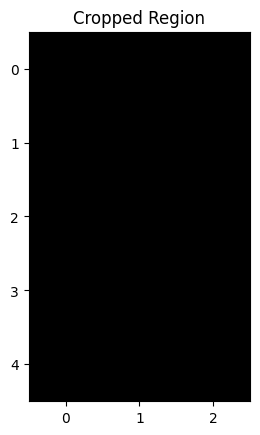

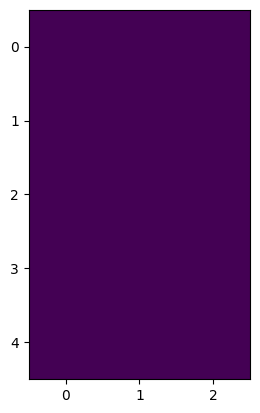

Extracted Text: 


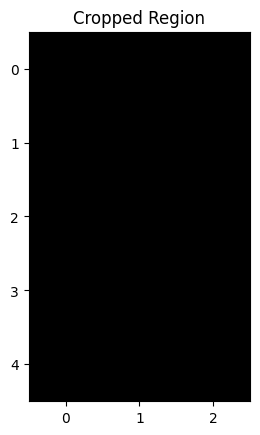

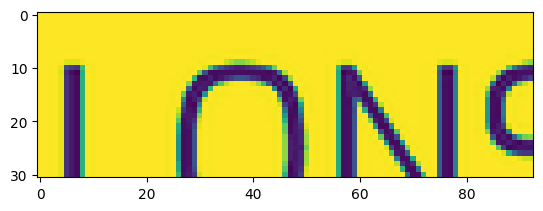

Extracted Text: im mw



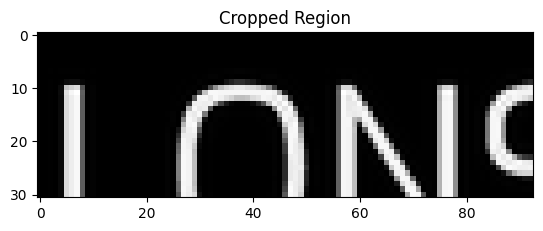

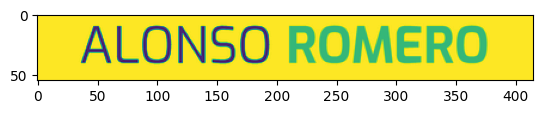

Extracted Text: ALONSO ROMERO



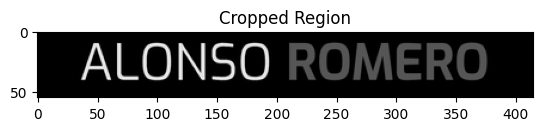

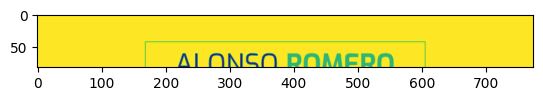

Extracted Text: AILONICN DNAACDNH



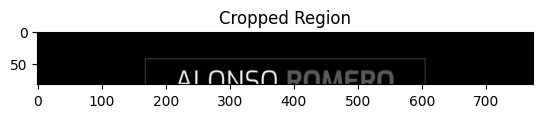

In [5]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image
import numpy as np

img = cv2.imread('./4.png')
rgb_img = img[:, :, :3]

edges = cv2.Canny(rgb_img, 25, 50, apertureSize=5, L2gradient=True)
kernel = np.ones((15, 15), np.uint8)
edges_dilated = cv2.dilate(edges, kernel)
plt.imshow(edges_dilated, cmap='gray')
plt.title("Segmented Image")
plt.show()
contours, _ = cv2.findContours(edges_dilated, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cropped_region = gray_image[y:y + h, x:x + w]
    plt.imshow(cropped_region)
    plt.show()
    pil_image = Image.fromarray((cropped_region * 255).astype(np.uint8))
    # Extract text using Tesseract OCR
    extracted_text = pytesseract.image_to_string(pil_image, config='--psm 6')
    print(f"Extracted Text: {extracted_text}")
    # Display the cropped region
    plt.imshow(pil_image, cmap='gray')
    plt.title("Cropped Region")
    plt.show()


# Prewitt Operator

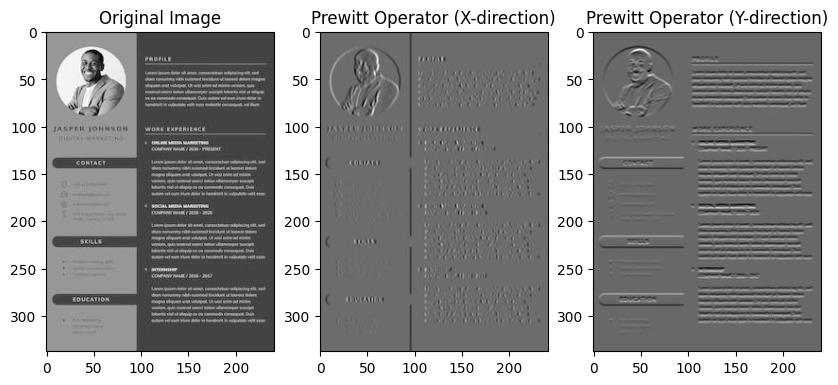

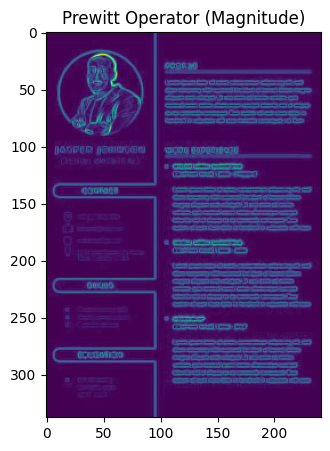

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = "./dataset/train/stylish-editable-cv-template-downloadable-psd-resume-professionals-entry-level-positions_53876-150702_jpg.rf.4a2db504cfa86df7cd2f32361b9d0da0.jpg" 
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the Prewitt kernels
kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# Apply the Prewitt kernels
prewitt_x = cv2.filter2D(img, cv2.CV_64F, kernel_x)
prewitt_y = cv2.filter2D(img, cv2.CV_64F, kernel_y)

# Combine the gradients to get the magnitude
prewitt_magnitude = cv2.magnitude(prewitt_x, prewitt_y)

# Display the original image and Prewitt edge detection results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(prewitt_x, cmap='gray')
plt.title('Prewitt Operator (X-direction)')

plt.subplot(1, 3, 3)
plt.imshow(prewitt_y, cmap='gray')
plt.title('Prewitt Operator (Y-direction)')

plt.show()

# Display the magnitude of the gradients
plt.figure(figsize=(5, 5))
plt.imshow(prewitt_magnitude)
plt.title('Prewitt Operator (Magnitude)')
plt.show()


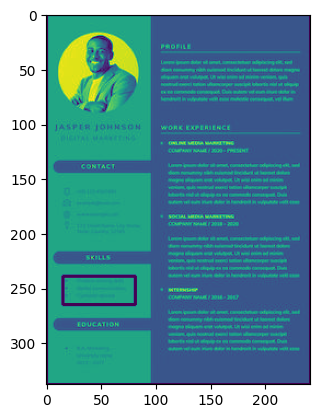

In [14]:
bounding_boxes = extract_text_regions(prewitt_magnitude)
image_with_boxes = img.copy()
for (x, y, w, h) in bounding_boxes:
    cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(image_with_boxes)
plt.show()

In [266]:
extracted_text = pytesseract.image_to_string(Image.fromarray((prewitt_magnitude * 255).astype(np.uint8)))
print("Extracted Text:")
print(extracted_text)


Extracted Text:
 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 



# Prewitt edge detector new approach
Reference : https://www.researchgate.net/publication/344295957_Text_Extraction_from_Natural_Scene_Images_using_Prewitt_Edge_Detection_Method

In [296]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

In [50]:
def threshold_image(image, threshold_value=200):
    thresh, thresholded = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY_INV)
    print(thresh)
    return thresholded

def apply_gaussian_filter(image, kernel_size=(5, 5), sigma=2):
    return cv2.GaussianBlur(image, kernel_size, sigma)

def apply_prewitt_edge_detector(image):
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

    prewitt_x = cv2.filter2D(image, cv2.CV_64F, kernel_x)
    prewitt_y = cv2.filter2D(image, cv2.CV_64F, kernel_y)

    magnitude = cv2.magnitude(prewitt_x, prewitt_y)
    return magnitude

def apply_dilation(image, kernel_size=3, iterations=1):
    kernel = np.ones((3, 3), np.uint8)
    dilated_image = cv2.dilate(image, kernel, iterations=iterations)
    return dilated_image

def draw_bounding_boxes(image, bounding_boxes):
    image_with_boxes = image.copy()
    for (x, y, w, h) in bounding_boxes:
        rect = image_with_boxes[y:y+h,x:x+w]
        text = pytesseract.image_to_string(rect)
        plt.imshow(rect)
        plt.show()
    return image_with_boxes


200.0


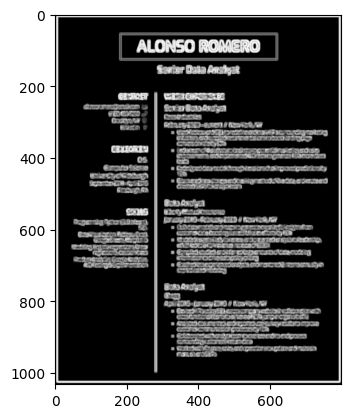

[[   2    2  796 1028]
 [ 178   51  445   80]
 [ 226   70  166   39]
 [ 400   70  173   39]
 [ 423  140   94   34]
 [ 283  141   80   27]
 [ 364  141   58   27]
 [ 276  216   10  786]
 [ 175  219   87   22]
 [ 302  219  173   22]
 [  78  249  161   76]
 [ 240  251   19   16]
 [ 303  251  176   27]
 [ 240  268   19   39]
 [ 303  277  107   19]
 [ 303  299  459   74]
 [ 483  299   97   21]
 [ 244  308   14   17]
 [ 322  325   12   12]
 [ 156  366  105   22]
 [ 338  371  419   49]
 [ 322  375   12   12]
 [ 229  397   31   19]
 [ 134  419  127   22]
 [ 338  421  421   34]
 [ 322  425   12   12]
 [  95  441  167   62]
 [ 338  456  423   36]
 [ 322  460   12   11]
 [ 303  515  172   49]
 [ 197  541   64   22]
 [ 301  563  444   92]
 [ 524  563   97   22]
 [ 510  564   13   19]
 [  45  571  216  141]
 [ 322  590   12   11]
 [ 322  624   12   12]
 [ 338  655  412   72]
 [ 322  659   12   12]
 [ 322  694   12   12]
 [ 303  749  117   27]
 [ 302  775  440  182]
 [ 496  797   97   22]
 [ 322  823

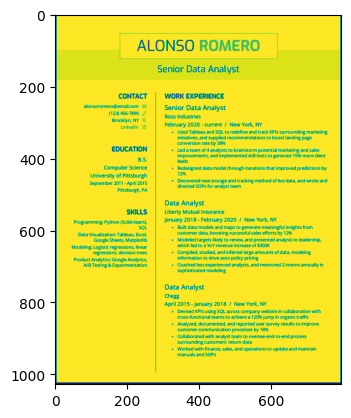

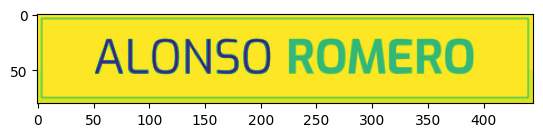

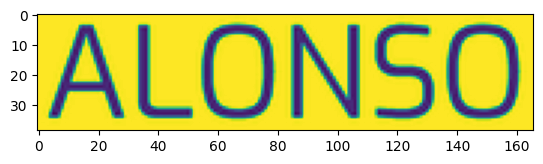

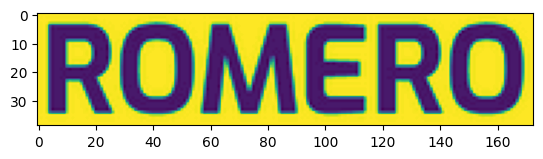

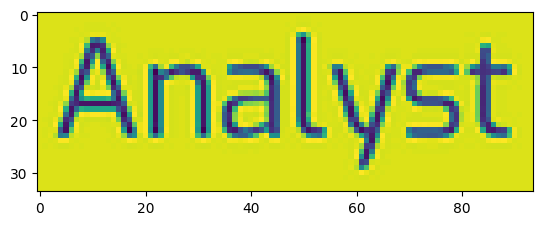

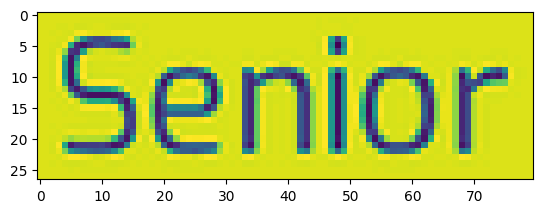

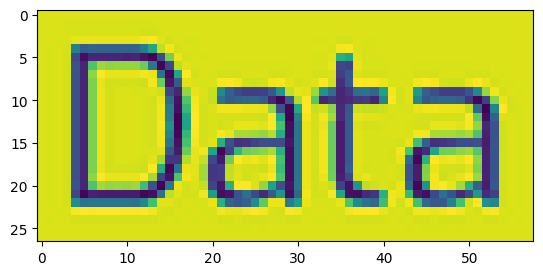

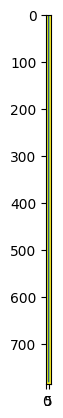

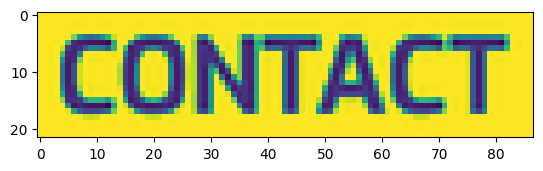

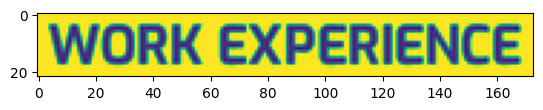

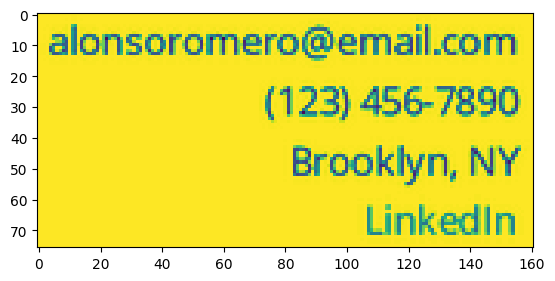

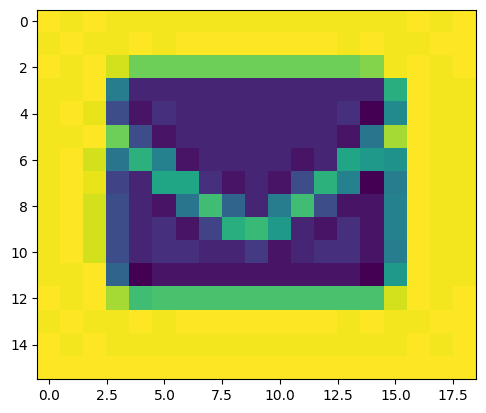

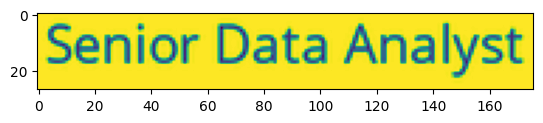

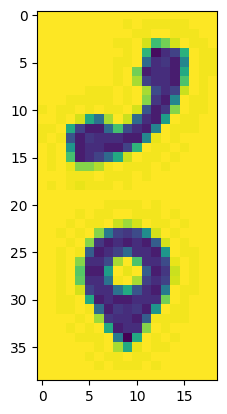

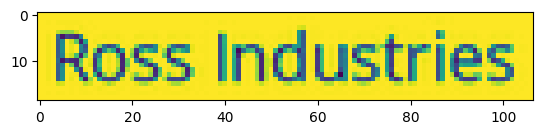

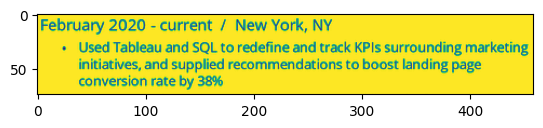

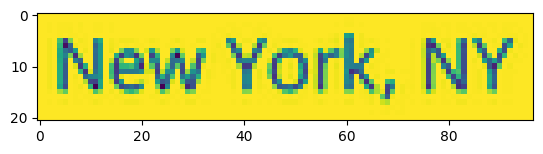

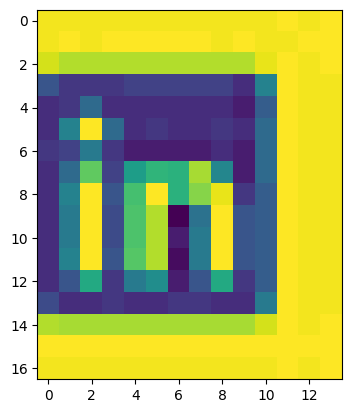

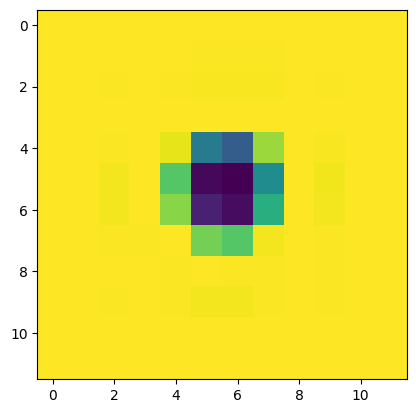

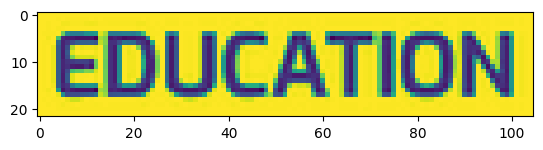

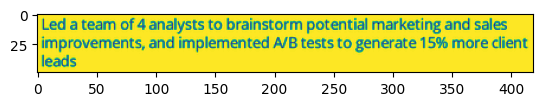

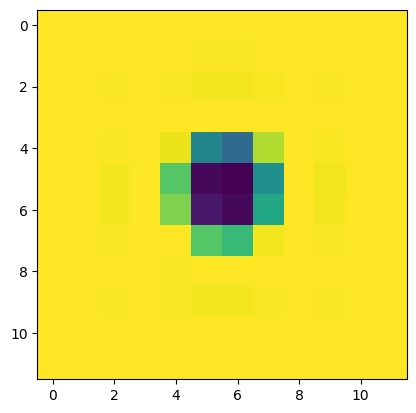

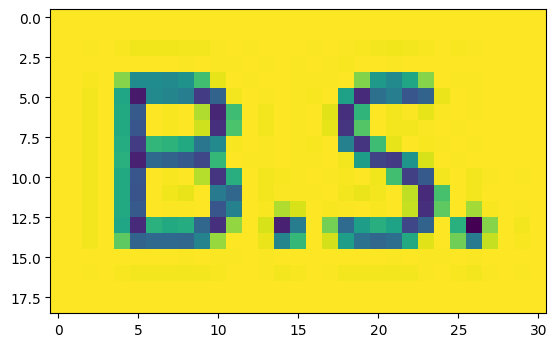

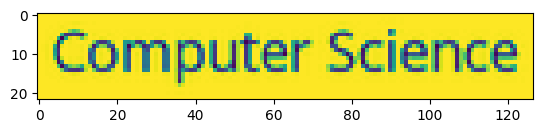

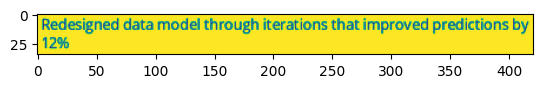

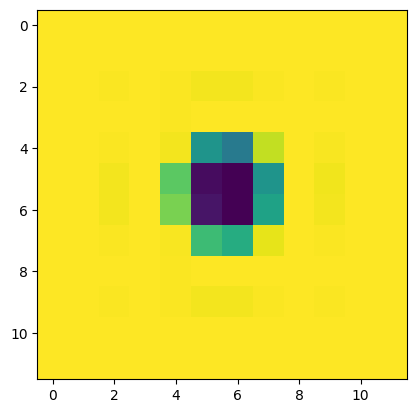

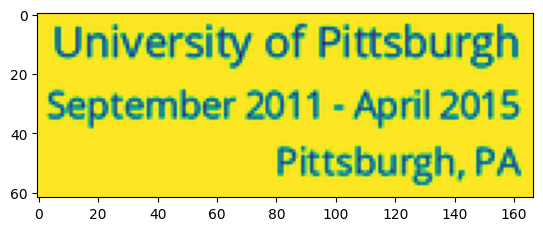

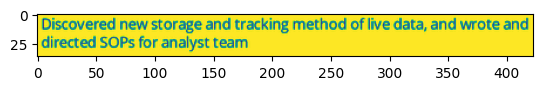

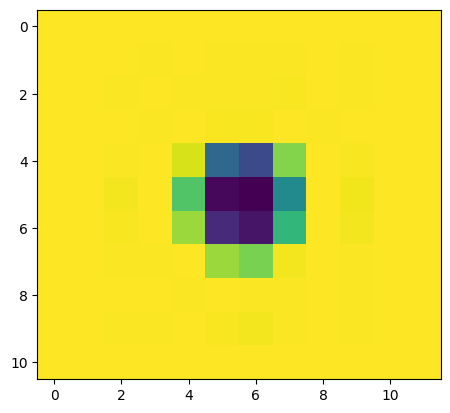

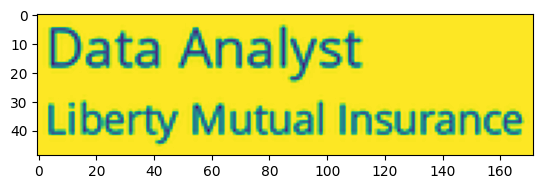

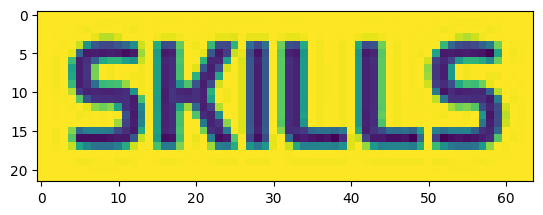

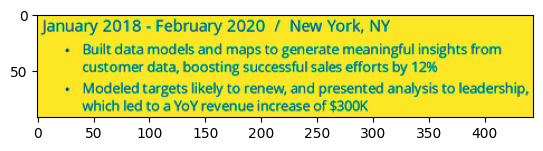

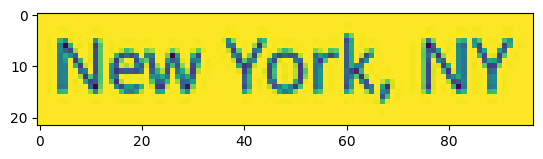

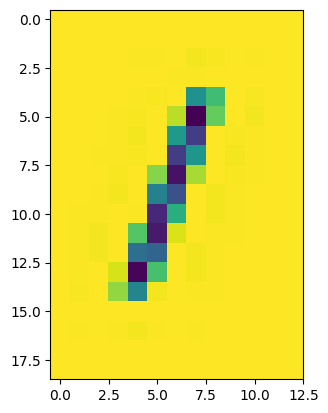

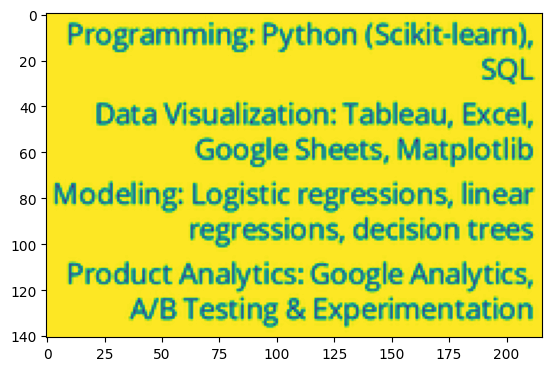

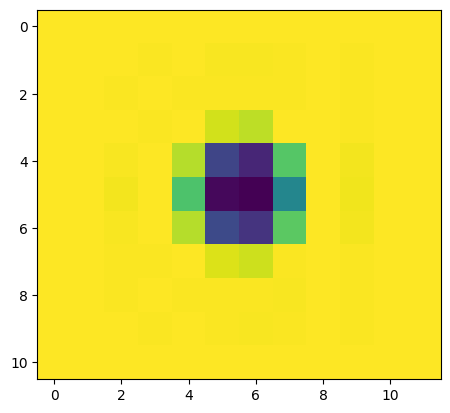

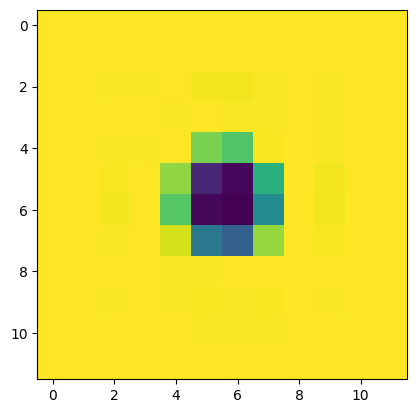

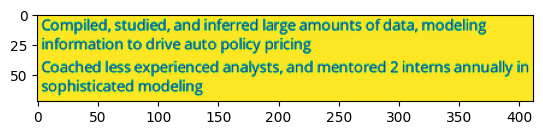

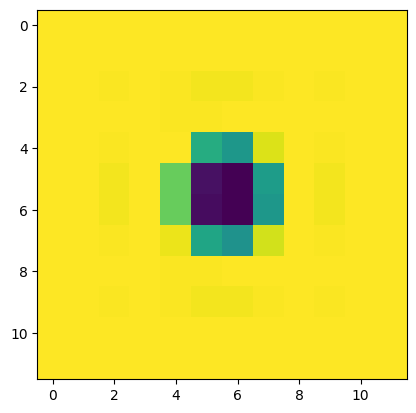

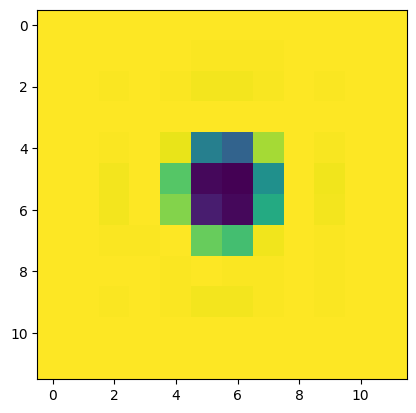

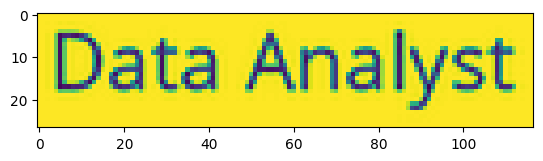

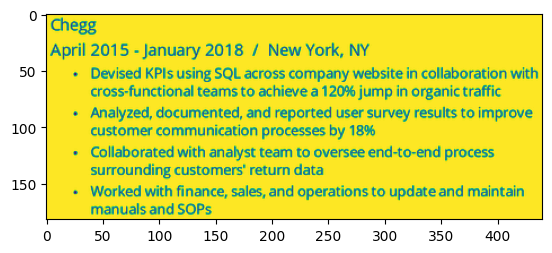

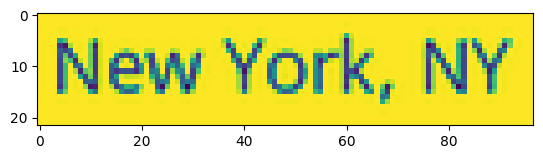

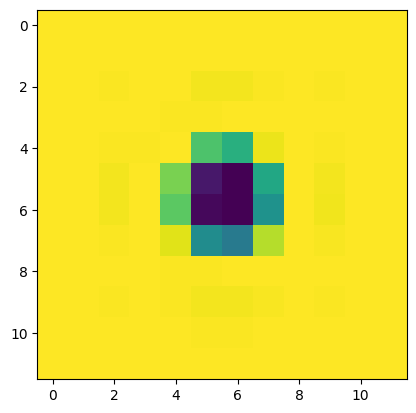

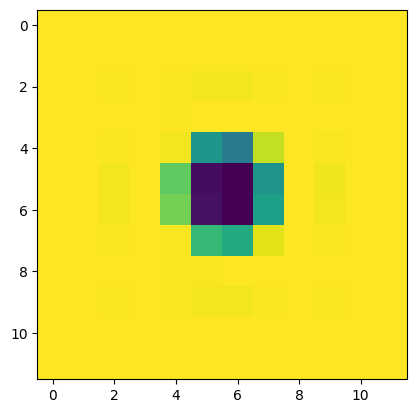

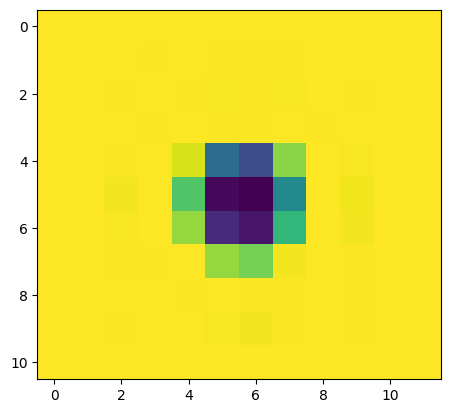

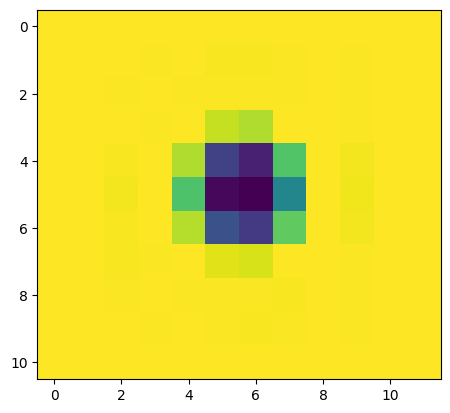

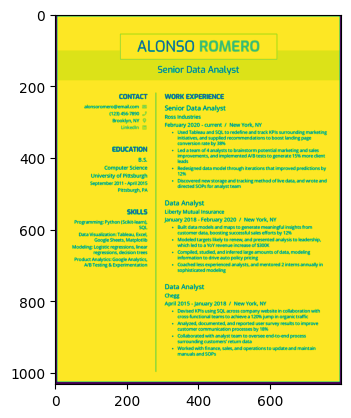

In [51]:
image_path = "./4.png"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
thresholded_image = threshold_image(original_image)
filtered_image = apply_gaussian_filter(thresholded_image)
prewitt_edges = apply_prewitt_edge_detector(filtered_image)
dilated_image = apply_dilation(prewitt_edges, kernel_size=12, iterations=1)
plt.imshow(dilated_image, cmap='gray')
plt.show()
bounding_boxes = extract_text_regions(dilated_image)
print(bounding_boxes)
image_with_boxes = draw_bounding_boxes(original_image, bounding_boxes)
plt.imshow(image_with_boxes)
plt.show()

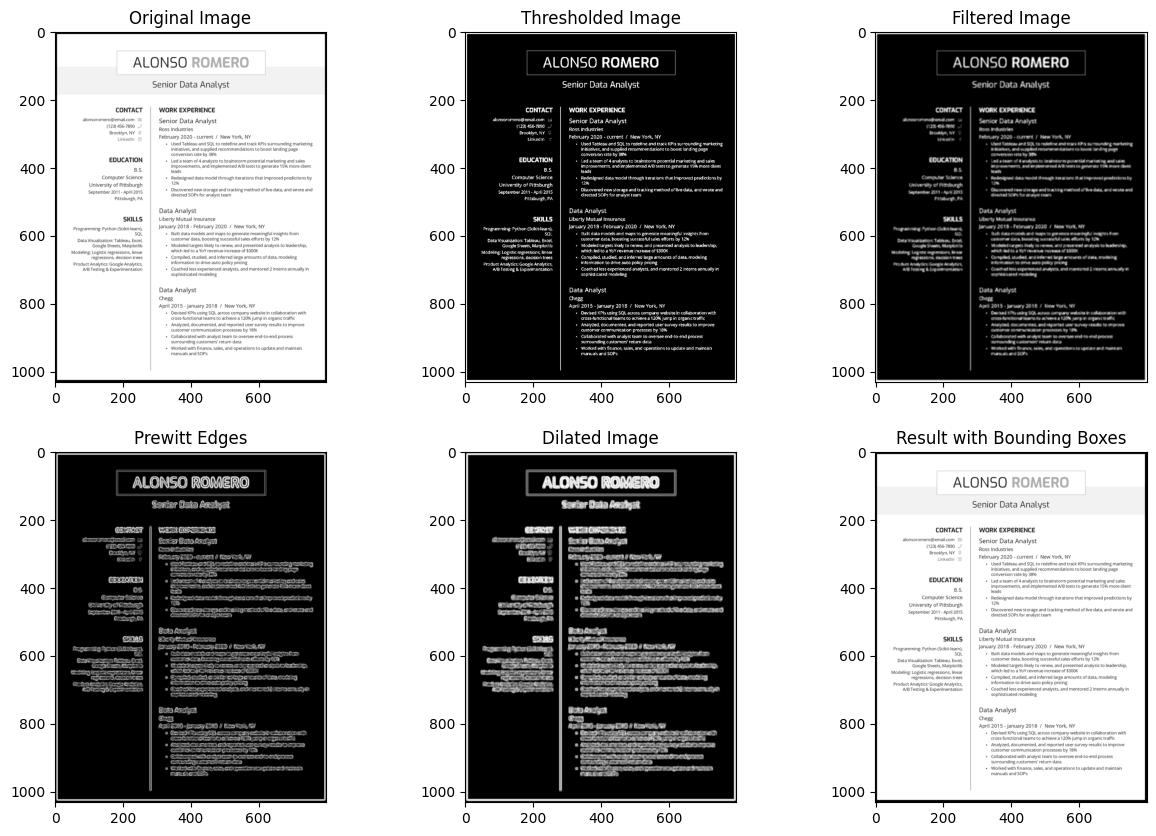

In [49]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')

plt.subplot(2, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')

plt.subplot(2, 3, 4)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edges')

plt.subplot(2, 3, 5)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')

plt.subplot(2, 3, 6)
plt.imshow(image_with_boxes, cmap='gray')
plt.title('Result with Bounding Boxes')

plt.show()

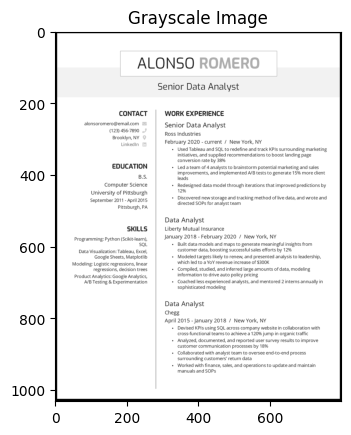

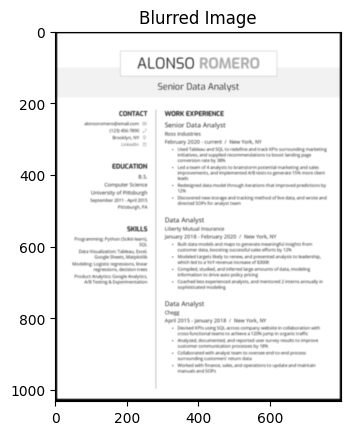

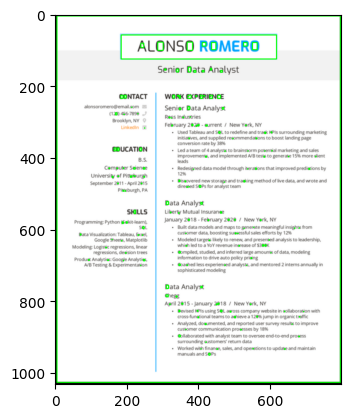

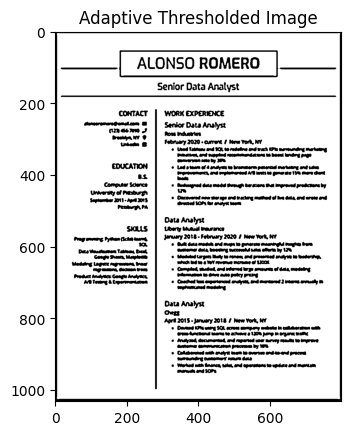

Extracted Text:
ALONSO ROMERO

Senior Data Analyst

WORK EXPERIENCE

Senior Data Analyst
Ross Inchuawtes
February 2020 - current # Mew York, NY
¢ Unnd Tattans and ICR, t0 redeline and wach KPa nerownding matoung
Dansient, ond mappind recmemand.asace to boon landing page
durerven cate by
© Led otnam of 4 snayses to bramaterm pateraad martating and salen
Wrgrerenares, and engharand N/E Wwuts 00 generate 1s mare chant

+ Reema ts mate omg he ese Sha proved proton by

© Oacovered now wer age and tacking mented of ive Gata, are arene ond
Grecred SOPs ts ane oom,

Data Analyst
Uber baaual neurance
January 2038 - February 2020 # Mew York, MY
© A dena erendets and mage to gurerene eaaringhd vanghts bem
curtemray Geta, taeeang weccewehs sales eferts by LS
© Mbesuled targets Maly te rene, and prowrted ansiyws te hetero,
whech Wed te 2 Vel roveran wareane of TKK
= Compted, meted, ard wéerred rps smwres of dats, moteirg
(rire te Orie ate patty prang
© Coached tans enpertenced anatyrts, and marture

In [285]:
import cv2
import matplotlib.pyplot as plt
import pytesseract

resume = cv2.imread("./4.png")
gray = cv2.cvtColor(resume, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.show()

blur = cv2.GaussianBlur(gray, (7, 7), 0)
plt.imshow(blur, cmap='gray')
plt.title('Blurred Image')
plt.show()

thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 25, 2)

bounding_boxes = extract_text_regions(thresh)
image_with_boxes = image.copy()
for (x, y, w, h) in bounding_boxes:
    cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(image_with_boxes)
plt.show()

plt.imshow(thresh, cmap='gray')
plt.title('Adaptive Thresholded Image')
plt.show()

extracted_text = pytesseract.image_to_string(thresh)
print("Extracted Text:")
print(extracted_text)


# Sobel of gaussian

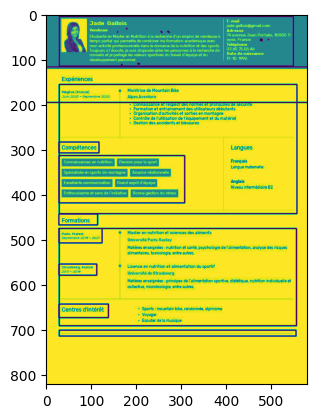

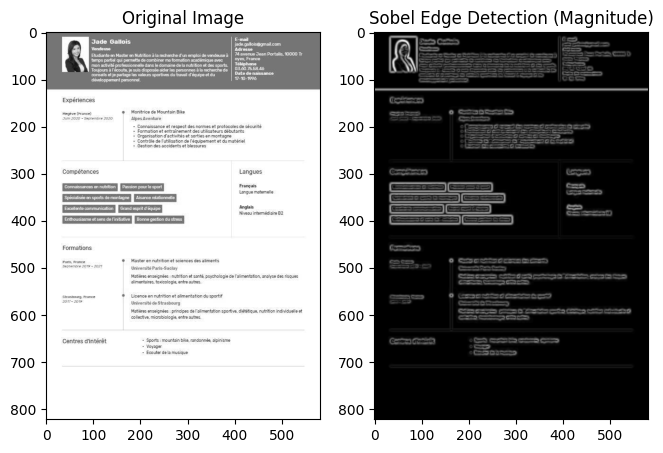

In [67]:
import cv2
import matplotlib.pyplot as plt

image_path = "./dataset/train/cv516_jpeg.rf.c10811be48cc852830d60631c54b5b71.jpg"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
original_image_blur = cv2.GaussianBlur(original_image, (5, 5), 2)

# Apply Sobel operator for edge detection
sobel_x = cv2.Sobel(original_image_blur, cv2.CV_64F, 1, 0, ksize=7)
sobel_y = cv2.Sobel(original_image_blur, cv2.CV_64F, 0, 1, ksize=7)

# Compute the magnitude of the gradient
magnitude = cv2.magnitude(sobel_x, sobel_y)

# Convert negative values to positive (absolute values)
magnitude = np.abs(magnitude)

magnitude_normalized = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Convert to uint8 data type for display
magnitude_normalized = np.uint8(magnitude_normalized)

kernel = np.ones((5, 5), np.uint8)

bounding_boxes = extract_text_regions(magnitude_normalized)
image_with_boxes = original_image.copy()
for (x, y, w, h) in bounding_boxes:
    cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(image_with_boxes)
plt.show()

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(magnitude_normalized, cmap='gray')
plt.title('Sobel Edge Detection (Magnitude)')

plt.show()


# PyMuPdf

Page 1 Bounding Boxes:
(0.0, 2.5200490951538086, 2.495859384536743, 13.560049057006836, ' \n', 0, 0)
(0.0, 25.080047607421875, 2.495859384536743, 36.12004470825195, ' \n', 1, 0)
(0.0, 47.420013427734375, 2.495859384536743, 58.46001052856445, ' \n', 2, 0)
(0.0, 69.98001098632812, 2.495859384536743, 81.02001190185547, ' \n', 3, 0)
(0.0, 92.54000854492188, 2.495859384536743, 103.58000946044922, ' \n', 4, 0)
(0.0, 115.13003540039062, 2.495859384536743, 126.17003631591797, ' \n', 5, 0)
(0.0, 137.45004272460938, 2.495859384536743, 148.4900360107422, ' \n', 6, 0)
(0.0, 160.01004028320312, 2.495859384536743, 171.05003356933594, ' \n', 7, 0)
(0.0, 182.57003784179688, 2.495859384536743, 193.6100311279297, ' \n', 8, 0)
(0.0, 204.91000366210938, 2.495859384536743, 215.9499969482422, ' \n', 9, 0)
(0.0, 227.47000122070312, 2.495859384536743, 238.50999450683594, ' \n', 10, 0)
(0.0, 250.02999877929688, 2.495859384536743, 261.07000732421875, ' \n', 11, 0)
(0.0, 272.5899963378906, 2.495859384536743, 283

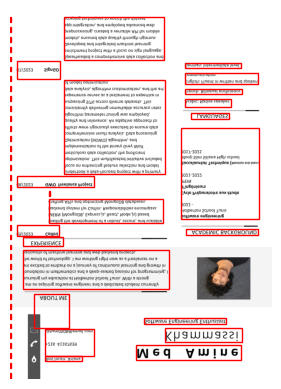

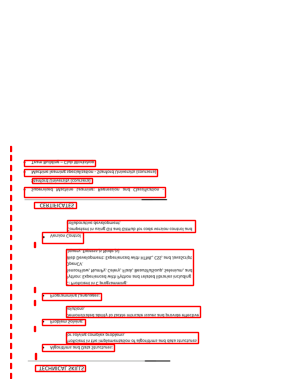

In [4]:
import fitz
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
import numpy as np

def save_page_images(pdf_path, output_folder):
    # Open the PDF file
    pdf_document = fitz.open(pdf_path)

    # Iterate through each page in the PDF
    for page_num in range(pdf_document.page_count):
        page = pdf_document[page_num]

        # Get the rectangles (bounding boxes) for all the text on the page
        rects = page.get_text("blocks", sort=False)

        # Get the image of the page as a NumPy array
        img = page.get_pixmap().samples

        # Get image width and height
        img_width, img_height = page.get_pixmap().width, page.get_pixmap().height

        # Convert image data to a NumPy array
        img_np = np.frombuffer(img, dtype=np.uint8).reshape((img_height, img_width, 3))

        # Convert image array to a PIL Image
        img_pil = Image.fromarray(img_np)

        # Create a new figure and axis
        fig, ax = plt.subplots()

        # Display the image
        ax.imshow(img_pil)

        # Plot each bounding box on the image
        for rect in rects:
            # Extract x0, y0, x1, y1 from the tuple
            x0, y0, x1, y1, _, _, _ = rect
            rect_patch = Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect_patch)

        # Invert y-axis
        ax.invert_yaxis()

        # Set axis limits and turn off axis labels
        ax.set_xlim(0, img_width)
        ax.set_ylim(0, img_height)
        plt.axis('off')

        # Save the plot as an image in the specified output folder
        output_path = f"{output_folder}/page_{page_num + 1}.png"
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0.1)

        # Print the bounding boxes
        print(f"Page {page_num + 1} Bounding Boxes:")
        for rect in rects:
            print(rect)

    # Close the PDF file
    pdf_document.close()

# Replace 'your_pdf.pdf' with the path to your PDF file
pdf_path = './Med-Amine-Khammassi.pdf'
output_folder = './output_images'
save_page_images(pdf_path, output_folder)


/home/amine/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Page 1 Bounding Boxes and Cluster Labels:
BBox: (0.0, 2.5200490951538086, 2.495859384536743, 13.560049057006836, ' \n', 0, 0), Cluster: 1
BBox: (0.0, 25.080047607421875, 2.495859384536743, 36.12004470825195, ' \n', 1, 0), Cluster: 1
BBox: (80.66400146484375, 41.180023193359375, 163.12586975097656, 52.22002029418945, 'Borj louzir, Ariana \n', 40, 0), Cluster: 1
BBox: (0.0, 47.420013427734375, 2.495859384536743, 58.46001052856445, ' \n', 2, 0), Cluster: 1
BBox: (287.1600036621094, 44.30001449584961, 526.5875244140625, 77.42001342773438, 'M e d  A m i n e \n', 37, 0), Cluster: 4
BBox: (0.0, 69.98001098632812, 2.495859384536743, 81.02001190185547, ' \n', 3, 0), Cluster: 1
BBox: (0.0, 92.54000854492188, 2.495859384536743, 103.58000946044922, ' \n', 4, 0), Cluster: 1
BBox: (80.66400146484375, 52.880001068115234, 190.9658660888672, 114.37999725341797, ' \n \n+216  41167639 \n \nLkham0508@gmail.com \n', 41, 0), Cluster: 1
BBox: (351.739990234375, 83.42001342773438, 527.0675659179688, 116.54000

/home/amine/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


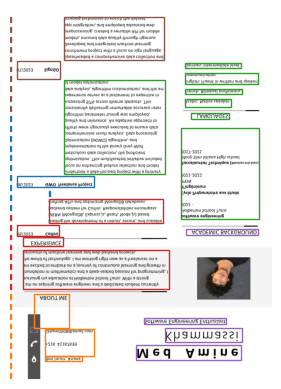

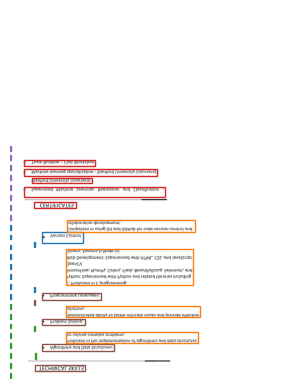

In [16]:
import fitz
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans

def kmeans_cluster_bounding_boxes(rectangles, n_clusters):
    # Extract the coordinates (x0, y0, x1, y1) from the rectangles
    coordinates = np.array([[rect[0], rect[1], rect[2], rect[3]] for rect in rectangles])

    # Use KMeans clustering to group the bounding boxes
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(coordinates)

    return cluster_labels

def save_page_images_with_clusters(pdf_path, output_folder, n_clusters):
    # Open the PDF file
    pdf_document = fitz.open(pdf_path)

    # Iterate through each page in the PDF
    for page_num in range(pdf_document.page_count):
        page = pdf_document[page_num]

        # Get the rectangles (bounding boxes) for all the text on the page
        rects = page.get_text("blocks", sort=True)

        # Cluster the bounding boxes using KNN
        cluster_labels = kmeans_cluster_bounding_boxes(rects, n_clusters)

        # Get the image of the page as a NumPy array
        img = page.get_pixmap().samples

        # Convert image data to a NumPy array
        img_np = np.frombuffer(img, dtype=np.uint8).reshape((page.get_pixmap().height, page.get_pixmap().width, 3))

        # Convert image array to a PIL Image
        img_pil = Image.fromarray(img_np)

        # Create a new figure and axis
        fig, ax = plt.subplots()

        # Display the image
        ax.imshow(img_pil)

        # Plot each bounding box on the image with different colors based on clusters
        for rect, cluster_label in zip(rects, cluster_labels):
            x0, y0, x1, y1, _, _, _ = rect
            rect_patch = Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=1, edgecolor='C'+str(cluster_label), facecolor='none')
            ax.add_patch(rect_patch)

        # Invert y-axis
        ax.invert_yaxis()

        # Set axis limits and turn off axis labels
        ax.set_xlim(0, page.get_pixmap().width)
        ax.set_ylim(0, page.get_pixmap().height)
        plt.axis('off')

        # Print the bounding boxes and cluster labels
        print(f"Page {page_num + 1} Bounding Boxes and Cluster Labels:")
        for rect, cluster_label in zip(rects, cluster_labels):
            print(f"BBox: {rect}, Cluster: {cluster_label}")

    # Close the PDF file
    pdf_document.close()

# Replace 'your_pdf.pdf' with the path to your PDF file
pdf_path = './Med-Amine-Khammassi.pdf'
output_folder = './output_images_with_clusters'
n_clusters = 6  # Specify the number of clusters for KNN
save_page_images_with_clusters(pdf_path, output_folder, n_clusters)
